# Training Models.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
"""
Esto nos da un array de 100 números aleatorios que siguen una normal de med = 1, var = 0
"""
X = 2 * np.random.rand (100, 1)
X


array([[1.75617126],
       [1.64260084],
       [0.37233574],
       [0.63170227],
       [0.65519763],
       [0.15551378],
       [1.34239032],
       [0.65938278],
       [1.89111828],
       [0.65484749],
       [1.47578584],
       [0.85179855],
       [0.75451191],
       [1.24927194],
       [1.29919961],
       [0.96535226],
       [0.69879253],
       [1.44042631],
       [1.12109158],
       [0.49434412],
       [0.21254363],
       [0.99818995],
       [0.26763822],
       [1.79780477],
       [1.35476735],
       [1.76796282],
       [0.50259653],
       [1.55791488],
       [1.92001705],
       [1.06190585],
       [0.4064666 ],
       [1.15858119],
       [0.275333  ],
       [1.53989417],
       [1.00461773],
       [0.06881877],
       [1.28046976],
       [0.29124374],
       [1.54611282],
       [0.24671546],
       [1.68917543],
       [0.67555099],
       [0.63263448],
       [0.18965324],
       [1.04751014],
       [1.90342915],
       [0.99265703],
       [1.706

In [5]:
"""
Esto hace que el valor real esté en una recta, pero estamos añadiendo un ruido extra.
Que es otro valor aleatorio que sigue una normal (0,1).
"""
y = 4 + 3 * X + np.random.randn (100, 1)
y



array([[ 9.16548171],
       [ 8.44883698],
       [ 4.7256742 ],
       [ 5.19419179],
       [ 5.7676829 ],
       [ 2.46335228],
       [ 8.04543203],
       [ 6.39873114],
       [10.61950266],
       [ 7.37605613],
       [ 7.76901999],
       [ 6.28552102],
       [ 5.82065235],
       [ 7.30913923],
       [ 7.87195799],
       [ 6.01983218],
       [ 6.1052243 ],
       [ 8.49616435],
       [ 6.04329109],
       [ 5.51567534],
       [ 6.07459125],
       [ 7.27355098],
       [ 3.94583096],
       [ 7.83862887],
       [ 7.46708652],
       [10.14999373],
       [ 6.44822713],
       [ 8.75416582],
       [11.14625967],
       [ 9.0114911 ],
       [ 5.24204517],
       [ 8.57427316],
       [ 5.01682724],
       [ 9.20661022],
       [ 7.45406389],
       [ 4.79082127],
       [10.01823016],
       [ 4.35758879],
       [ 7.29491904],
       [ 3.7273639 ],
       [ 7.83270331],
       [ 5.0351385 ],
       [ 5.80969121],
       [ 5.97507362],
       [ 6.69633548],
       [10

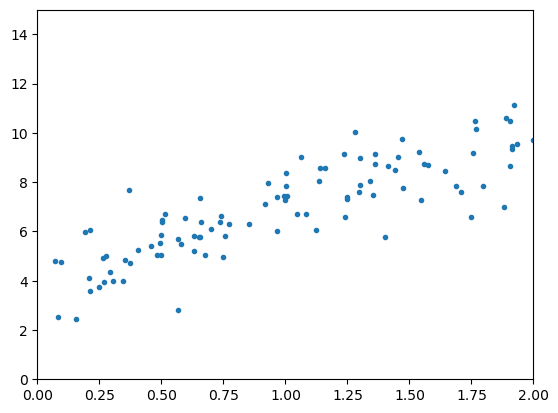

In [6]:
plt.plot (X,y, '.')
plt.ylim (0, 15)
plt.xlim (0, 2)
plt.show ()

In [7]:
"""
Es importante añadir una columna de 1s porque queremos que aprenda también el bias.
Si NO lo añadinos es una regresión sin bias: y = theta*x.
"""
X_b = np.c_[np.ones((100, 1)), X] #Crea una matriz nueva con la primera columna de 1.
X_b

array([[1.        , 1.75617126],
       [1.        , 1.64260084],
       [1.        , 0.37233574],
       [1.        , 0.63170227],
       [1.        , 0.65519763],
       [1.        , 0.15551378],
       [1.        , 1.34239032],
       [1.        , 0.65938278],
       [1.        , 1.89111828],
       [1.        , 0.65484749],
       [1.        , 1.47578584],
       [1.        , 0.85179855],
       [1.        , 0.75451191],
       [1.        , 1.24927194],
       [1.        , 1.29919961],
       [1.        , 0.96535226],
       [1.        , 0.69879253],
       [1.        , 1.44042631],
       [1.        , 1.12109158],
       [1.        , 0.49434412],
       [1.        , 0.21254363],
       [1.        , 0.99818995],
       [1.        , 0.26763822],
       [1.        , 1.79780477],
       [1.        , 1.35476735],
       [1.        , 1.76796282],
       [1.        , 0.50259653],
       [1.        , 1.55791488],
       [1.        , 1.92001705],
       [1.        , 1.06190585],
       [1.

In [8]:
## Ecuación normal

theta_best = np.linalg.inv (X_b.T.dot (X_b)).dot(X_b.T).dot (y)
theta_best

array([[4.02912854],
       [2.94238418]])

In [9]:
## Predicciones con los parámetros estimados.
X_new = np.array ([[0],[2]]) # Es una predicción para 0 y 2, que son nuestro features
X_new_b = np.c_[np.ones((2,1)), X_new] # Esto para incluir el bias.
y_predict = X_new_b.dot (theta_best) #Esta es la predicción para 0 y 2, respectivamente.
y_predict

array([[4.02912854],
       [9.91389691]])

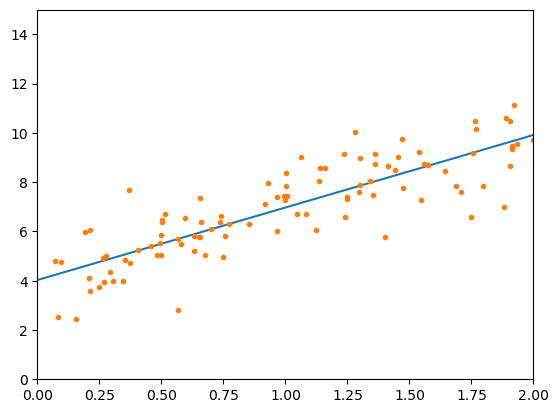

In [10]:
## Con esos 2 puntos nos sirve para definir una recta.

plt.plot (X_new, y_predict, '-')
plt.plot (X, y, '.')
plt.axis ([0,2, 0,15])
plt.show ()

In [11]:
## Podemos obtener el mismo resultado usando sklearn

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression ()
lin_reg.fit (X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.02912854]), array([[2.94238418]]))

In [12]:
lin_reg.predict (X_new)

array([[4.02912854],
       [9.91389691]])

In [13]:
## Esta librería se basa en scipy.linalg.lstsq (mínimos cuadrados)

theta_best2, residuals, rank, s = np.linalg.lstsq (X_b, y, rcond = 1e-6)
theta_best2

array([[4.02912854],
       [2.94238418]])

Hay mucha teoría matemática detrás de esta última librería, que me las salto. (Computación de la pseudoinversa de la matriz X...)



# Gradient Descent: Batch Gradient Descent for linear regression

In [15]:
## Gradient descent for lineal regression

eta = 0.1
iterations = 1000
m = 100 #Número de datos
theta = np.random.randn (2,1) # Valores iniciales aleatorios

for i in range (iterations):
    gradient = 2/m * (X_b.T.dot(X_b.dot(theta) - y))
    theta = theta - eta * gradient
print (theta)


[[4.02912854]
 [2.94238418]]


# Gradiente Descent for linear regression: Stochastic Gradiente Descent (SGD)

In [17]:
n_epochs = 50
t0, t1 = 5, 50 #Estos son los hiperparámetros del learning schedule

def learning_schedule (t):
    return t0 / (t + t1)

theta = np.random.randn (2, 1)

for epoch in range (n_epochs):
    for i in range (m):
        random_index = np.random.randint (m)
        xi = X_b [random_index: random_index + 1]
        yi = y [random_index: random_index + 1]
        gradients = 2 * xi.T.dot (xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) #Disminuye según va aumentando las iteraciones
        theta = theta - eta * gradients
theta

array([[4.02545018],
       [2.91447074]])

In [18]:
## SGC por sklearn

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
#max_iter == n_epochs; eta0 es el valore de eta inicial (tiene una función de learning schedule integrado).
#Por defecto optimiza MSE para modelos lineales.
sgd_reg.fit (X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.97897864]), array([2.91505153]))

# Mini-batch Gradient Descent

In [20]:
n_epochs = 50
t0, t1 = 5, 50 #Estos son los hiperparámetros del learning schedule

def learning_schedule (t):
    return t0 / (t + t1)

theta = np.random.randn (2, 1)

for epoch in range (n_epochs):
    for i in range (m):
        random_index = np.random.randint (m)
        xi = X_b [random_index: random_index + 5] #Random set
        yi = y [random_index: random_index + 5]
        gradients = 2 * xi.T.dot (xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) #Disminuye según va aumentando las iteraciones
        theta = theta - eta * gradients
theta

array([[4.05533131],
       [2.92933675]])

# Regresión polinomial

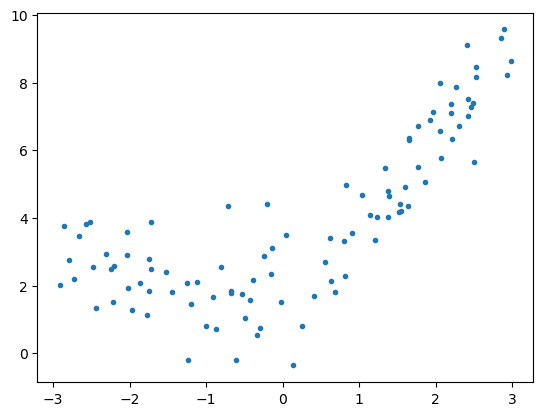

In [41]:
 ## Generación de un nuevo set de datos.
 m = 100 #Número de datos
 X = 6 * np.random.rand (m, 1) - 3
 y = 0.5 * X**2 + X + 2 + np.random.randn (m, 1)
 plt.plot (X, y, '.')
 plt.show ()

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures (degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X) #Hace que el cuadrado sea un nuevo feature
X_poly

array([[-1.54634450e+00,  2.39118132e+00],
       [-6.22234392e-01,  3.87175639e-01],
       [ 2.72043687e+00,  7.40077675e+00],
       [-5.52696213e-01,  3.05473104e-01],
       [-7.94266671e-01,  6.30859545e-01],
       [ 2.27604510e+00,  5.18038131e+00],
       [ 1.87040470e+00,  3.49841376e+00],
       [-7.79511706e-02,  6.07638500e-03],
       [-8.06273811e-01,  6.50077459e-01],
       [-2.04352921e+00,  4.17601162e+00],
       [ 6.09102737e-01,  3.71006144e-01],
       [-9.50337410e-01,  9.03141194e-01],
       [-1.46573611e+00,  2.14838233e+00],
       [ 2.74550763e+00,  7.53781212e+00],
       [-2.69982732e-01,  7.28906758e-02],
       [-6.08545202e-01,  3.70327263e-01],
       [-9.02293184e-02,  8.14132989e-03],
       [-2.01054104e+00,  4.04227528e+00],
       [ 1.56006429e+00,  2.43380058e+00],
       [-8.03193671e-01,  6.45120073e-01],
       [-9.40116147e-02,  8.83818369e-03],
       [ 2.99489252e+00,  8.96938118e+00],
       [-5.82598722e-01,  3.39421270e-01],
       [-1.

In [36]:
## Realizamos la regresión lineal para estos nuevos features.

lin_reg = LinearRegression ()
lin_reg.fit (X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.77383545]), array([[0.95021761, 0.5323558 ]]))

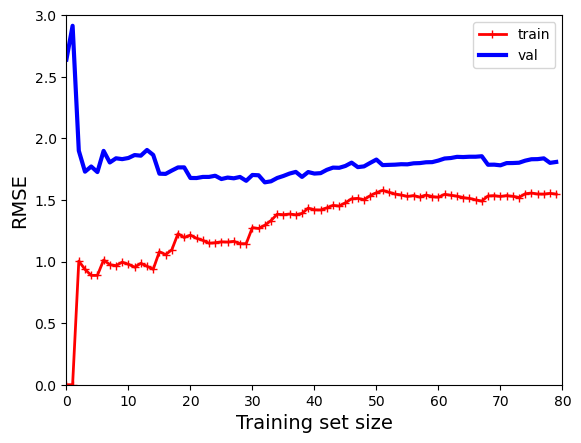

In [42]:
## Curvas de aprendizaje.

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)
lin_reg = LinearRegression ()
plot_learning_curves(lin_reg, X, y)
plt.axis ([0, 80, 0, 3])
plt.legend ()
plt.show()



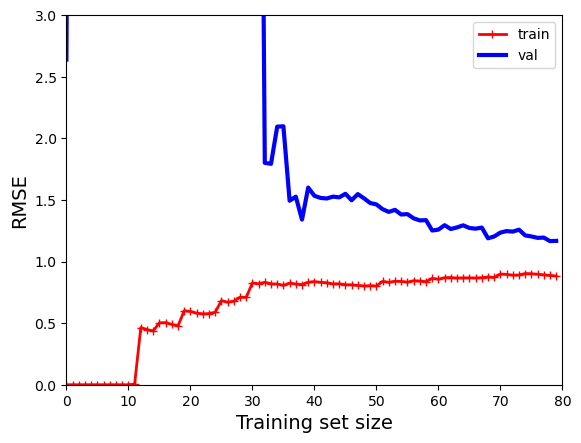

In [49]:
## Construimos una curva overfitting (10th grado).

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures (degree = 10, include_bias = False)),
    ("linear_regression", LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)
plt.legend ()
plt.axis ([0, 80, 0, 3])
plt.show()

# Modelos lineales regularizados: Ridge Regression

In [51]:
## Estimación de hiperparámetros por ecuación normal.

from sklearn.linear_model import Ridge
ridge_reg = Ridge (alpha = 1, solver = "cholesky")
ridge_reg.fit (X, y)
ridge_reg.predict ([[1.5]])

array([5.2735521])

In [52]:
## Estimación de hiperparámetros por SGD

sgd_reg = SGDRegressor(penalty="l2") #El penalty sirve para indicar el método de regularización. En el caso de l2, significa que añadimos un término de regularización, que es igual a la mitad de la norma l2 (theta^2) del vector de peso == Ridge
sgd_reg.fit (X, y.ravel())
sgd_reg.predict ([[1.5]])

array([5.26074817])

# Lasso Regression

In [54]:
## Hay un módulo dentro de sklearn que permite hacer esta regresión

from sklearn.linear_model import Lasso
lasso_reg = Lasso (alpha = 0.1)
lasso_reg.fit (X, y)
lasso_reg.predict ([[1.5]])

array([5.23464113])

In [55]:
## Se puede hacer por SGDRegressor

sgd_reg = SGDRegressor(penalty = "l1")
sgd_reg.fit (X, y.ravel())
sgd_reg.predict ([[1.5]])

array([5.25616759])

# Elasctic Net

In [56]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet (alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit (X, y)
elastic_net.predict ([[1.5]])

array([5.23419653])

# Logistic Regression

In [3]:
from sklearn import datasets
iris = datasets.load_iris ()
list (iris.keys ())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [11]:
import numpy as np
X = iris ["data"][:, 3:] #Anchura pétalos
y = (iris ["target"] == 2 ).astype (np.int8) #Iris virginica == 1. Else == 0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression ()
log_reg.fit (X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
X_new = np.linspace (0,3,1000).reshape (-1, 1)
X_new [0]

array([0.])

In [19]:
y_proba = log_reg.predict_proba (X_new) #Predict_proba, devuelva la probabilidad NO la clase
y_proba

array([[9.99249051e-01, 7.50949397e-04],
       [9.99239224e-01, 7.60776030e-04],
       [9.99229269e-01, 7.70731151e-04],
       ...,
       [3.08499021e-03, 9.96915010e-01],
       [3.04523414e-03, 9.96954766e-01],
       [3.00598887e-03, 9.96994011e-01]])

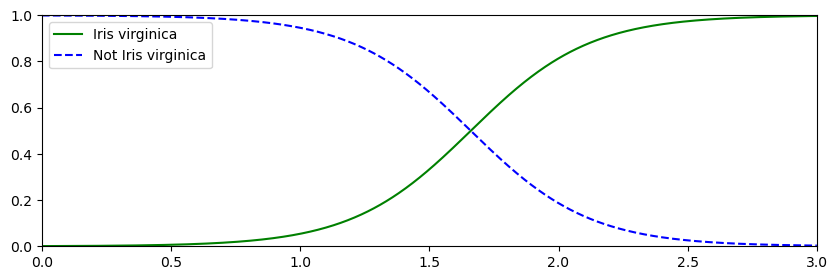

In [23]:
import matplotlib.pyplot as plt
plt.figure (figsize = (10, 3))
plt.plot (X_new, y_proba [:, 1], "g-", label = "Iris virginica")
plt.plot (X_new, y_proba[:, 0], "b--", label = "Not Iris virginica") #
plt.legend ()
plt.axis ([0,3,0,1])
plt.show ()

# Softmax Regression

In [26]:
X = iris ["data"][:, (2,3)] #Longitud y ancho
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [32]:
y = iris ["target"]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
softmax_reg = LogisticRegression (multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit (X, y)

C:\Users\leonz\anaconda3\envs\TFG_Yixi\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [34]:
softmax_reg.predict ([[5,2]])

array([2])

In [35]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626373e-07, 5.73689802e-02, 9.42630398e-01]])